<a href="https://colab.research.google.com/github/annikabrundyn/semantic_cognition/blob/main/pred_test_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### mount gdrive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install git+https://github.com/PyTorchLightning/pytorch-lightning
import pytorch_lightning as pl

In [3]:
%%capture
!pip install numpy==1.20.2

     |████████████████████████████████| 15.3MB 301kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [1]:
%cd /content/drive/MyDrive/CCM_Project

/content/drive/.shortcut-targets-by-id/1n0HzIhxNyNo6PhdIqIFVZn5JxNmbkp8E/CCM_Project


In [2]:
!ls

 ccm_analysis.ipynb		      Data_Copy         semantic_cognition
 ckpt-test.ckpt			      data_old	        test_images
'Copy of CCM Project Homies.gdoc'     model_artifacts   toy_data.zip
'Copy of CCM Project Proposal.gdoc'   myckpt.ckpt
 data				      REPORT.gdoc


In [3]:
%%capture
!git clone https://github.com/annikabrundyn/semantic_cognition.git
#!cd semantic_cognition && pip install -r requirements.txt

In [4]:
%cd semantic_cognition/src

/content/drive/.shortcut-targets-by-id/1n0HzIhxNyNo6PhdIqIFVZn5JxNmbkp8E/CCM_Project/semantic_cognition/src


In [5]:
import os
import torch
from tqdm import tqdm
from argparse import ArgumentParser

import numpy as np

import pytorch_lightning as pl
#from torchvision.utils import save_image

import matplotlib.pyplot as plt

from model import BaseModel
from datamodule import SemanticDataModule

In [6]:
# install project
#!cd semantic_cognition && pip install -e .

In [7]:
!ls

analysis.py	   __init__.py		save_rep_callback.py
baseline_model.py  model_components.py	semantic_cognition.egg-info
datamodule.py	   model.py
data_utils.py	   __pycache__


In [8]:
### LOAD MODEL CHECKPOINT

test_dir = '/content/drive/MyDrive/CCM_Project/test_images'
ckpt_path = '/content/drive/MyDrive/CCM_Project/myckpt.ckpt'

In [9]:
# # model args
# parser = ArgumentParser()
# parser = pl.Trainer.add_argparse_args(parser)
# parser = BaseModel.add_model_specific_args(parser)
# parser.add_argument("-f", type=str, help="google colab weirdness")
# #args = parser.parse_args(["--gpus", "1", "--batch_size", "1"])
# args = parser.parse_args()



In [10]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = BaseModel.load_from_checkpoint(checkpoint_path=ckpt_path)
#model.to(device)
model.eval()
model.freeze()

In [11]:
dm = SemanticDataModule(root_dir=test_dir,
                        imgs_per_item=1,
                        crop_size=64,
                        seed=98264,
                        batch_size=1,
                        num_workers=0)
dm.prepare_data()

In [12]:
test_dl = dm.train_dataloader()

In [13]:
batch = next(iter(test_dl))

In [14]:
batch.keys()

dict_keys(['item_name', 'img', 'rel', 'attr'])

In [15]:
print(batch['item_name'])

['robin']


In [16]:
batch['img'].shape

torch.Size([1, 3, 64, 64])

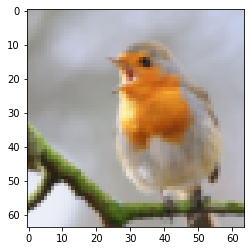

In [17]:
# input
plt.imshow(batch['img'].squeeze(0).permute(1, 2, 0) )

In [18]:
print(batch['rel'])

tensor([[0., 1., 0., 0.]])


In [21]:
# pred
pred, hidden, rep = model(batch['img'], batch['rel'])

In [22]:
pred

tensor([[3.1334e-03, 1.8754e-04, 1.7253e-02, 8.7119e-05, 3.3060e-04, 6.6340e-02,
         3.5325e-04, 1.7192e-04, 4.1998e-04, 1.7276e-03, 3.8415e-04, 4.7167e-02,
         1.4292e-02, 2.7629e-04, 9.4154e-04, 4.1413e-02, 1.8512e-02, 9.8878e-01,
         1.0066e-02, 6.0794e-01, 2.7250e-01, 7.7400e-03, 2.8538e-02, 7.6136e-04,
         1.0374e-01, 1.6314e-02, 2.4910e-02, 2.1231e-04, 6.9658e-04, 1.2096e-04,
         1.1519e-04, 2.9461e-04, 9.2768e-02, 8.5961e-02, 4.8997e-04, 5.7860e-04]])

In [23]:
#target

batch['attr']

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])